# Basic

In [1]:
from mxnet import ndarray as nd

In [2]:
nd.zeros((3,4))


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
<NDArray 3x4 @cpu(0)>

In [4]:
x = nd.ones((3,4))
x


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
<NDArray 3x4 @cpu(0)>

In [5]:
nd.array([[1,2],[2,3]])


[[ 1.  2.]
 [ 2.  3.]]
<NDArray 2x2 @cpu(0)>

In [13]:
x.shape

(3, 4)

In [14]:
x.size

12

In [15]:
y = nd.random_normal(loc=0, scale=1, shape=(3,4))
y


[[-0.68106437 -0.13531584  0.37723127  0.41016445]
 [ 0.5712682  -2.7579627   1.07628    -0.61413258]
 [ 1.83076489 -1.14680648  0.05383795 -2.50748062]]
<NDArray 3x4 @cpu(0)>

In [20]:
y.T


[[-0.68106437  0.5712682   1.83076489]
 [-0.13531584 -2.7579627  -1.14680648]
 [ 0.37723127  1.07628     0.05383795]
 [ 0.41016445 -0.61413258 -2.50748062]]
<NDArray 4x3 @cpu(0)>

In [16]:
x + y


[[ 0.31893563  0.86468416  1.37723124  1.41016448]
 [ 1.5712682  -1.7579627   2.07628012  0.38586742]
 [ 2.83076477 -0.14680648  1.05383801 -1.50748062]]
<NDArray 3x4 @cpu(0)>

In [17]:
x * y 


[[-0.68106437 -0.13531584  0.37723127  0.41016445]
 [ 0.5712682  -2.7579627   1.07628    -0.61413258]
 [ 1.83076489 -1.14680648  0.05383795 -2.50748062]]
<NDArray 3x4 @cpu(0)>

In [18]:
nd.exp(y)


[[ 0.50607806  0.87344003  1.45824146  1.50706565]
 [ 1.77051103  0.06342085  2.93374562  0.54111004]
 [ 6.23865652  0.31764957  1.05531359  0.08147325]]
<NDArray 3x4 @cpu(0)>

In [19]:
nd.dot(x, y.T)


[[-0.02898449 -1.72454715 -1.7696842 ]
 [-0.02898449 -1.72454715 -1.7696842 ]
 [-0.02898449 -1.72454715 -1.76968431]]
<NDArray 3x3 @cpu(0)>

In [21]:
a = nd.arange(3).reshape((3,1))
b = nd.arange(2).reshape((1,2))
print('a:', a)
print('b:', b)
print('a+b:', a+b)

a: 
[[ 0.]
 [ 1.]
 [ 2.]]
<NDArray 3x1 @cpu(0)>
b: 
[[ 0.  1.]]
<NDArray 1x2 @cpu(0)>
a+b: 
[[ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]]
<NDArray 3x2 @cpu(0)>


In [22]:
import numpy as np
x = np.ones((2,3))
y = nd.array(x)
z = y.asnumpy()
print([z, y])

[array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32), 
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @cpu(0)>]


## autograd

In [23]:
import mxnet.autograd as ag
x = nd.array([[1,2],[3,4]])

In [24]:
x.attach_grad()
with ag.record():
    y = x * 2
    z = y * x
z.backward()

In [25]:
z


[[  2.   8.]
 [ 18.  32.]]
<NDArray 2x2 @cpu(0)>

In [28]:
print('x.grad: ', x.grad)
x.grad == 4*x

x.grad:  
[[  4.   8.]
 [ 12.  16.]]
<NDArray 2x2 @cpu(0)>



[[ 1.  1.]
 [ 1.  1.]]
<NDArray 2x2 @cpu(0)>

## Linear Regression

In [29]:
num_inputs = 2 
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:,0] + true_w[1] * X[:,1] + true_b
y += 0.01 * nd.random_normal(shape=y.shape)

In [30]:
print(X[0], y[0])


[-0.59164983  0.85860491]
<NDArray 2 @cpu(0)> 
[ 0.0774615]
<NDArray 1 @cpu(0)>


In [31]:
import matplotlib.pylab as plt
%matplotlib inline

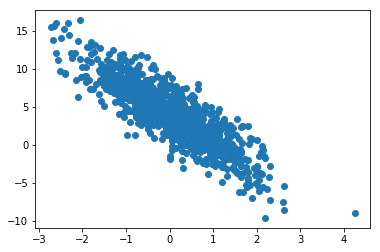

In [34]:
plt.scatter(X[:,1].asnumpy(), y.asnumpy())
plt.show()

In [35]:
nd.take??

In [36]:
import random
batch_size = 10
def data_iter():
    # generate a random index
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size, num_examples)])
        yield nd.take(X, j), nd.take(y, j)

In [37]:
for data, label in data_iter():
    print(data, label)
    break


[[-0.82884139  0.95916933]
 [-1.05921721 -0.47244707]
 [ 1.95405543 -1.30499935]
 [ 1.29278076 -0.51974952]
 [-0.52814519  0.58491355]
 [ 0.05416773 -1.21203637]
 [-0.75324053 -0.692307  ]
 [-0.4337191   1.31509745]
 [-0.79148197 -0.08282007]
 [-0.30746168 -0.84847331]]
<NDArray 10x2 @cpu(0)> 
[ -0.7172271    3.68189192  12.55500031   8.55026245   1.1586498
   8.41831684   5.04476595  -1.15747511   2.9034462    6.48849154]
<NDArray 10 @cpu(0)>


In [38]:
w = nd.random_normal(shape=(num_inputs,1))
b = nd.zeros((1,))
params = [w,b]

In [39]:
for param in params:
    param.attach_grad()

In [40]:
def net(X):
    return nd.dot(X, w) + b

In [41]:
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2 

In [42]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [43]:
def real_fn(X):
    return 2 * X[:,0] - 3.4 * X[:,1] + 4.2

In [50]:
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1,2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(), \
             net(X[:sample_size,:]).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(), \
             real_fn(X[:sample_size,:]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 0, batch 99. Moving avg of loss: 0.111994659547. Average loss: 0.128705


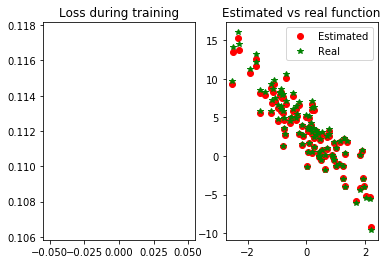

Epoch 1, batch 199. Moving avg of loss: 0.0411196149524. Average loss: 0.017253


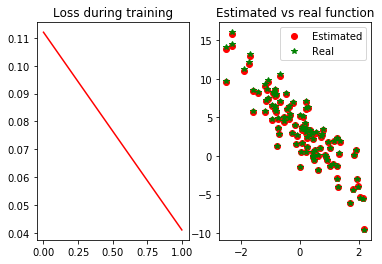

Epoch 2, batch 299. Moving avg of loss: 0.0150626421265. Average loss: 0.002353


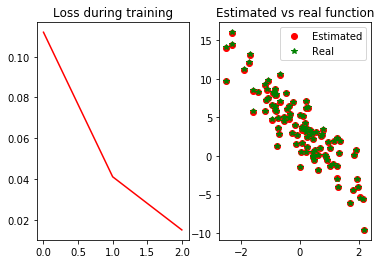

Epoch 3, batch 399. Moving avg of loss: 0.00554649849275. Average loss: 0.000359


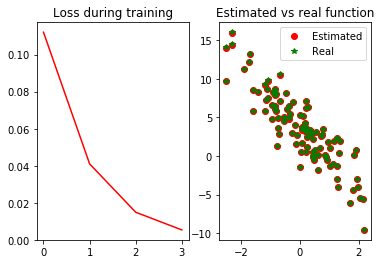

Epoch 4, batch 499. Moving avg of loss: 0.00206078398941. Average loss: 0.000091


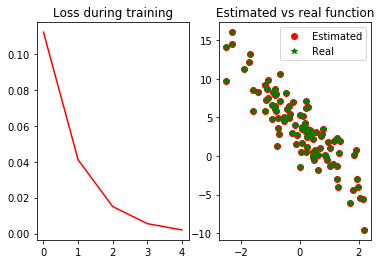

In [51]:
epochs = 5
learning_rate = 0.001
niter = 0
losses = []
moving_loss = 0
smoothing_constant = 0.01
for e in range(epochs):
    total_loss = 0
    for data, label in data_iter():
        with ag.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        total_loss += nd.sum(loss).asscalar()
        
        niter += 1
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (1 - smoothing_constant) * moving_loss + smoothing_constant * curr_loss
        
        # correct the bias from the moving averages
        est_loss = moving_loss / (1-(1-smoothing_constant)**niter)
        if(niter+1) % 100 == 0:
            losses.append(est_loss)
            print("Epoch %s, batch %s. Moving avg of loss: %s. Average loss: %f" % \
                  (e, niter, est_loss, total_loss/num_examples))
            plot(losses, X)

In [52]:
true_w, w

([2, -3.4], 
 [[ 1.99848974]
  [-3.3972888 ]]
 <NDArray 2x1 @cpu(0)>)

In [53]:
true_b, b

(4.2, 
 [ 4.19627714]
 <NDArray 1 @cpu(0)>)